# Exploring the Relationship Between the Meta Scores of Films and the Reviews of the General Audiance?


## Introduction:

IMDB is an online database of information related to films, television series, podcasts, and other forms of entertainment content. For our project we will be working specifically with movie (film) data from IMDB. This database presents data regarding several aspects of the content - including cast, production crew, plot summary, and scores. IMDB presents two kinds of scores; IMDB scores which are user-generated, meaning they are an average of reviews submitted on the IMDB website by non-critic viewers, and Meta Scores which are critic-generated, meaning they are an average of reviews from critics, professionals who analyze films. 

For our project we will try to answer the following question:
"How accurate are the Meta Scores of films in representing the general interest of the viewers?"

The dataset presented is from Kaggle, and includes data from the top 1000 movies based on the IMDB score from the IMBD online database. The dataset includes data for movie name (Series_Title), year of release (Released_year), certificate earner by the movie e.g. R, A, UA, U (Certificate), total runtime (Runtime), genre (Genre), the IMDB score of the movie (IMDB_Rating), plot summary (Overview), the Meta score of the movie (Meta_score), the director (Director), stars of the movie (Star1, Star2, Star3, Star4), number of reviews on IMDB (No_of_votes), and the amount of money earned by the movie (Gross). For this project will analyze the relationship between audience perception of a movie (IMDB scores) and the Meta scores of the movies.


Dataset Origin: https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows

In [1]:
### Initialize. 
library(tidyverse)
library(repr)
library(rvest)
library(stringr)
library(dplyr)
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




In [2]:
### Reading from Github
url <- "https://github.com/anh-dong/dsci-100-2023w1-group-33/blob/main/data/imdb_top_1000.csv?raw=true"
movies_raw <- read_csv(url)

Rows: 499 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (11): Poster_Link, Series_Title, Certificate, Runtime, Genre, Overview, ...
dbl  (4): Released_Year, IMDB_Rating, Meta_score, No_of_Votes
num  (1): Gross

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
### Table Summary
movies <- movies_raw |>
    select(Meta_score, IMDB_Rating, Released_Year) |>
    filter(Released_Year > 1970) |>
    mutate(Meta_score = round(scale(Meta_score), 0), IMDB_Rating = round(scale(IMDB_Rating), 0))

movies_table_Meta_scores <- movies |>
    group_by(Meta_score) |>
    summarize(Meta_score_count = n()) |>
    rename(normalized_value = Meta_score)


movies_table_IMDB_Rating <- movies |>
    group_by(IMDB_Rating) |>
    summarize(IMDB_Rating_count = n()) |>
    rename(normalized_value = IMDB_Rating)

joined <- left_join(movies_table_Meta_scores, movies_table_IMDB_Rating) |>
    mutate(IMDB_Rating_count = replace(IMDB_Rating_count, is.na(IMDB_Rating_count), 0))
joined

Joining with `by = join_by(normalized_value)`


normalized_value,Meta_score_count,IMDB_Rating_count
"<dbl[,1]>",<int>,<dbl>
-4,1,0
-3,4,0
-2,19,0
-1,65,137
0,110,143
1,92,69
2,11,17
NA,75,0


Warning message:
“Removed 75 rows containing non-finite values (`stat_bin()`).”


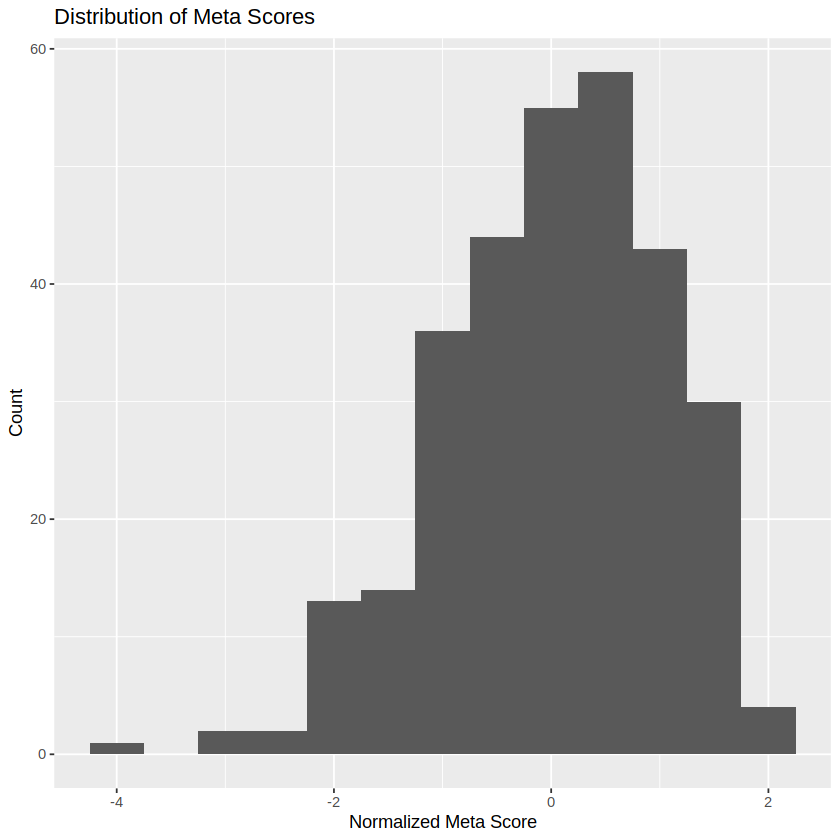

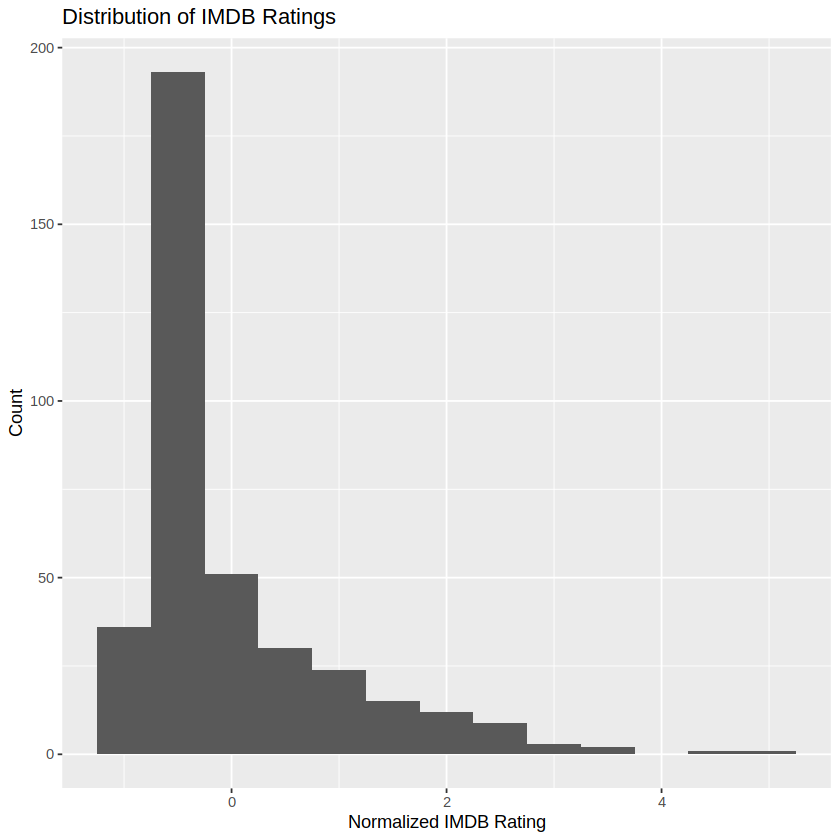

In [4]:
### Summary Visual
movies <- movies_raw |>
    select(Meta_score, IMDB_Rating, Released_Year) |>
    filter(Released_Year > 1970) |>
    mutate(Meta_score = scale(Meta_score), IMDB_Rating = scale(IMDB_Rating))

Meta_score_hist <- movies |>
    ggplot(aes(Meta_score)) +
        geom_histogram(binwidth = 0.5) +
        xlab("Normalized Meta Score") +
        ylab("Count") +
        ggtitle("Distribution of Meta Scores")
Meta_score_hist

IMDB_Review_hist <- movies |>
    ggplot(aes(IMDB_Rating)) +
        geom_histogram(binwidth = 0.5) +
        xlab("Normalized IMDB Rating") +
        ylab("Count") +
        ggtitle("Distribution of IMDB Ratings")
IMDB_Review_hist

## Methods:

In the first step we used the select and filter functions to filter out the columns we needed from the data. We removed the Poster Link and Overview scores and filtered the movies to after 1970.

In the second step we extracted the Meta scores and IMDB ratings from the data using select and plotted them as a histogram to see the average of the ratings more visually.

For further observation, we extracted the columns for Gross, Runtime, and IMDB scores and then plotted each against the year as three scatter plots. In addition, we also plotted scatter plots based on Meta Score and these three variables.

These graphs can better help us to find the direct relationship of each variable and thus make hypothesis for further research.

## Expected Outcomes and Significance:

Our prediction is that that the Meta Scores will be somewhat proportional to each other, but will vary to some extent. We expect this variation because the individuals who provided the reviews for which the IMDB scores are based off of are most likely 